In [1]:
import sys
import math
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [15, 10]
np.set_printoptions(precision=3)

plt.rc('font', family='Malgun Gothic') # For Windows
print(plt.rcParams['font.family'])

['Malgun Gothic']


In [2]:
df = pd.read_csv('./NHIS_OPEN_GJ_2017_100.csv',encoding='EUC-KR')
df1 = pd.read_csv('./NHIS_OPEN_GJ_2018_100.csv')
df = df.append([df1])
df.describe()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
count,2000000.00000,2000000.00000,2000000.00000,2000000.00000,2000000.00000,2000000.00000,2000000.00000,1999320.00000,1999564.00000,1999545.00000,1999625.00000,1999627.00000,1994251.00000,1994252.00000,1994043.00000,1332713.00000,1332703.00000,1332702.00000,1322966.00000,1994034.00000,1984838.00000,1994051.00000,1994053.00000,1994052.00000,1994049.00000,1999622.00000,1644521.00000,2000000.00000,399992.00000,0.00000,0.00000,0.00000,800516.00000,2000000.00000
mean,2017.50000,500000.50000,1.46700,10.56190,33.69548,162.26038,63.42898,81.34754,0.97864,0.97624,1.03270,1.03152,122.54810,76.06142,100.65998,195.63884,133.54789,56.80952,113.10659,14.25832,1.09581,0.86330,26.14770,26.01790,37.39504,1.60723,0.69569,0.40026,0.21516,nan,nan,nan,0.60334,20186172.50000
std,0.50000,288675.20676,0.49891,2.86050,12.67530,9.31009,12.62693,11.06285,0.60739,0.60474,0.17784,0.17471,14.59186,9.95403,24.18251,39.18748,103.84583,19.29372,36.56292,1.58389,0.43906,0.49866,25.01259,26.78962,50.61595,0.81761,0.46012,0.48995,0.41094,nan,nan,nan,0.59162,5046.50126
min,2017.00000,1.00000,1.00000,5.00000,11.00000,125.00000,25.00000,1.00000,0.10000,0.10000,1.00000,1.00000,58.00000,27.00000,23.00000,6.00000,1.00000,1.00000,1.00000,0.50000,1.00000,0.10000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,nan,nan,nan,0.00000,20181126.00000
25%,2017.00000,250000.75000,1.00000,8.00000,27.00000,155.00000,55.00000,74.50000,0.70000,0.70000,1.00000,1.00000,112.00000,70.00000,89.00000,169.00000,74.00000,46.00000,89.00000,13.20000,1.00000,0.70000,19.00000,15.00000,16.00000,1.00000,0.00000,0.00000,0.00000,nan,nan,nan,0.00000,20181126.00000
50%,2017.50000,500000.50000,1.00000,11.00000,41.00000,160.00000,60.00000,81.00000,1.00000,1.00000,1.00000,1.00000,121.00000,76.00000,96.00000,193.00000,108.00000,55.00000,111.00000,14.30000,1.00000,0.80000,23.00000,20.00000,23.00000,1.00000,1.00000,0.00000,0.00000,nan,nan,nan,1.00000,20186172.50000
75%,2018.00000,750000.25000,2.00000,13.00000,43.00000,170.00000,70.00000,88.00000,1.20000,1.20000,1.00000,1.00000,131.00000,82.00000,105.00000,220.00000,160.00000,65.00000,135.00000,15.40000,1.00000,1.00000,29.00000,30.00000,40.00000,2.00000,1.00000,1.00000,0.00000,nan,nan,nan,1.00000,20191219.00000
max,2018.00000,1000000.00000,2.00000,18.00000,50.00000,190.00000,140.00000,999.00000,9.90000,9.90000,2.00000,2.00000,273.00000,185.00000,872.00000,2386.00000,9490.00000,8110.00000,5119.00000,25.00000,6.00000,98.00000,9999.00000,7210.00000,999.00000,3.00000,1.00000,1.00000,1.00000,nan,nan,nan,2.00000,20191219.00000


In [3]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.00000,1.00000,1.00000,1.00000,1.00000,120.00000,80.00000,99.00000,193.00000,92.00000,48.00000,126.00000,17.10000,1.00000,1.00000,21.00000,35.00000,40.00000,1.00000,1.00000,1,nan,nan,nan,nan,1.00000,20181126
1,2017,2,1,7,11,180,80,89.00000,0.90000,1.20000,1.00000,1.00000,130.00000,82.00000,106.00000,228.00000,121.00000,55.00000,148.00000,15.80000,1.00000,0.90000,20.00000,36.00000,27.00000,3.00000,0.00000,1,nan,nan,nan,nan,2.00000,20181126
2,2017,3,1,9,41,165,75,91.00000,1.20000,1.50000,1.00000,1.00000,120.00000,70.00000,98.00000,136.00000,104.00000,41.00000,74.00000,15.80000,1.00000,0.90000,47.00000,32.00000,68.00000,1.00000,0.00000,0,nan,nan,nan,nan,nan,20181126
3,2017,4,1,11,48,175,80,91.00000,1.50000,1.20000,1.00000,1.00000,145.00000,87.00000,95.00000,201.00000,106.00000,76.00000,104.00000,17.60000,1.00000,1.10000,29.00000,34.00000,18.00000,1.00000,0.00000,1,nan,nan,nan,nan,0.00000,20181126
4,2017,5,1,11,30,165,60,80.00000,1.00000,1.20000,1.00000,1.00000,138.00000,82.00000,101.00000,199.00000,104.00000,61.00000,117.00000,13.80000,1.00000,0.80000,19.00000,12.00000,25.00000,1.00000,0.00000,1,nan,nan,nan,nan,0.00000,20181126


In [4]:
df = df.drop(['기준년도','가입자일련번호','시도코드','데이터공개일자','시력(좌)','시력(우)','청력(좌)','청력(우)','구강검진수검여부','치아우식증유무','결손치유무','치아마모증유무','제3대구치(사랑니)이상','치석'],axis=1)
df["음주여부"] = df["음주여부"].fillna(value=0)
df = df.dropna(subset=['허리둘레','수축기혈압','이완기혈압','식전혈당(공복혈당)','요단백','음주여부','흡연상태','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','혈색소','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마지티피']) #결측치있는행 모두제거
df

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,1,8,170,75,90.00000,120.00000,80.00000,99.00000,193.00000,92.00000,48.00000,126.00000,17.10000,1.00000,1.00000,21.00000,35.00000,40.00000,1.00000,1.00000
1,1,7,180,80,89.00000,130.00000,82.00000,106.00000,228.00000,121.00000,55.00000,148.00000,15.80000,1.00000,0.90000,20.00000,36.00000,27.00000,3.00000,0.00000
2,1,9,165,75,91.00000,120.00000,70.00000,98.00000,136.00000,104.00000,41.00000,74.00000,15.80000,1.00000,0.90000,47.00000,32.00000,68.00000,1.00000,0.00000
3,1,11,175,80,91.00000,145.00000,87.00000,95.00000,201.00000,106.00000,76.00000,104.00000,17.60000,1.00000,1.10000,29.00000,34.00000,18.00000,1.00000,0.00000
4,1,11,165,60,80.00000,138.00000,82.00000,101.00000,199.00000,104.00000,61.00000,117.00000,13.80000,1.00000,0.80000,19.00000,12.00000,25.00000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999978,1,8,180,65,77.00000,123.00000,89.00000,92.00000,158.00000,139.00000,70.00000,60.00000,15.90000,1.00000,1.00000,11.00000,8.00000,15.00000,3.00000,1.00000
999979,1,13,155,60,87.00000,129.00000,70.00000,82.00000,274.00000,239.00000,45.00000,181.00000,16.40000,1.00000,1.30000,65.00000,127.00000,64.00000,3.00000,1.00000
999981,2,14,155,55,83.00000,146.00000,69.00000,99.00000,216.00000,122.00000,43.00000,148.00000,12.40000,1.00000,0.70000,21.00000,15.00000,23.00000,1.00000,0.00000
999982,2,14,155,55,84.00000,130.00000,80.00000,95.00000,222.00000,173.00000,39.00000,148.00000,12.90000,1.00000,0.80000,29.00000,14.00000,19.00000,1.00000,0.00000


In [5]:
df = df.loc[df["허리둘레"] >= 40] #허리둘레 이상치 있는 행 제거
df = df.loc[df["허리둘레"] <= 140]
df['허리둘레'].value_counts().sort_index()

40.00000     2
42.00000     1
43.00000     1
48.00000     1
49.00000     1
            ..
135.00000    2
136.00000    2
136.80000    1
138.00000    1
140.00000    1
Name: 허리둘레, Length: 745, dtype: int64

In [6]:
df.isnull().sum()

성별코드           0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg단위)      0
허리둘레           0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
dtype: int64

In [7]:
obesity = df[['성별코드','허리둘레']].copy() 
obesity["복부비만"] = 0
obesity.loc[(obesity['성별코드'] == 1) & (obesity['허리둘레'] >= 90),'복부비만'] = 1
obesity.loc[(obesity['성별코드'] == 2) & (obesity['허리둘레'] >= 85),'복부비만'] = 1
df["복부비만"] = obesity["복부비만"] #복부비만 컬럼 추가

weight = df[['신장(5Cm단위)', '체중(5Kg단위)']].copy()

weight['BMI'] = weight['체중(5Kg단위)'] / ( (weight['신장(5Cm단위)'] / 100) * (weight['신장(5Cm단위)']/100) )

df['BMI'] = weight['BMI'] #bmi컬럼 추가

bmi = df['BMI'].copy()
def bmi_code(x):
    if(x >= 30):
        return 2
    elif(25 <= x < 30):
        return 1
    else:
        return 0

bmi = bmi.apply(bmi_code)
df["BMI코드"] = bmi #bmi코드 컬럼 추가


blood_pressure = df[['이완기혈압', '수축기혈압']].copy()
blood_pressure["고혈압"] = 0
blood_pressure.loc[(blood_pressure['이완기혈압'] < 80),'고혈압'] = 0
blood_pressure.loc[(80 <= blood_pressure['이완기혈압']) ,'고혈압'] = 1
blood_pressure.loc[(90 <= blood_pressure['이완기혈압']) & (blood_pressure['이완기혈압'] < 100),'고혈압'] = 2
blood_pressure.loc[(blood_pressure['이완기혈압'] >= 100),'고혈압'] = 3

blood_pressure.loc[blood_pressure['수축기혈압'] < 120,'고혈압'] = 0
blood_pressure.loc[(120 <= blood_pressure['수축기혈압']) &  (blood_pressure['수축기혈압'] < 140),'고혈압'] = 1
blood_pressure.loc[(140 <= blood_pressure['수축기혈압']) &  (blood_pressure['수축기혈압'] < 160),'고혈압'] = 2
blood_pressure.loc[(blood_pressure['수축기혈압'] >= 160),'고혈압'] = 3
df["고혈압"] = blood_pressure["고혈압"] #고혈압 컬럼 추가


diabete = df["식전혈당(공복혈당)"].copy()

def is_diabete(x):
    if(x >= 126):
        return 1
    else:
        return 0

diabete = diabete.apply(is_diabete)
df["당뇨병"] = diabete #당뇨병 컬럼 추가
df = df.drop(['식전혈당(공복혈당)'],axis=1)
df.columns

Index(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '복부비만',
       'BMI', 'BMI코드', '고혈압', '당뇨병'],
      dtype='object')

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

array = df.values
X = array[:,0:23]
Y = array[:,23]

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
fit.scores_

array([1.064e+03, 2.499e+04, 3.397e+01, 2.104e+04, 3.710e+04, 3.616e+04,
       9.572e+03, 3.252e+04, 1.662e+06, 5.362e+04, 9.804e+04, 6.324e+02,
       2.612e+03, 3.078e+02, 1.018e+05, 2.678e+05, 1.447e+06, 1.508e+03,
       5.192e+01, 1.471e+04, 9.020e+03, 1.173e+04, 1.350e+04])

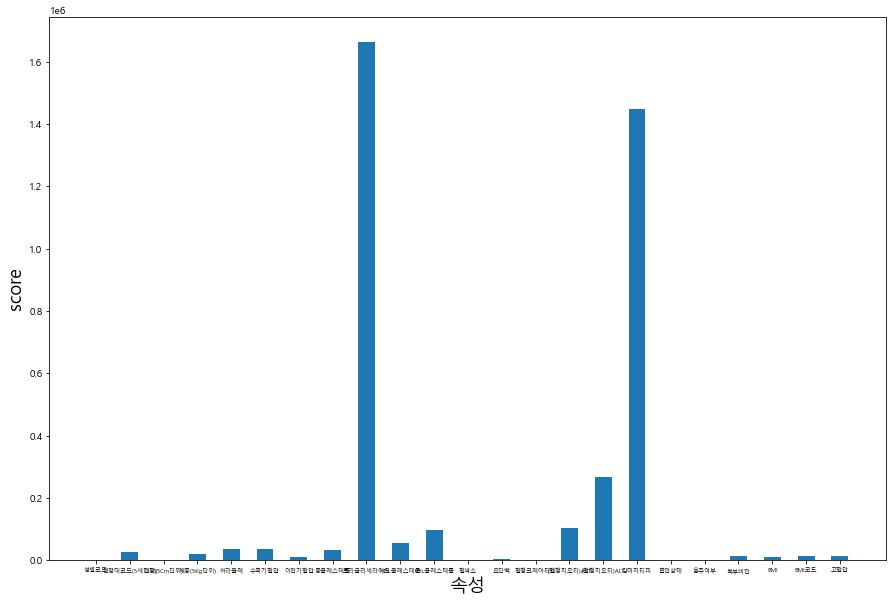

In [32]:
label = np.array(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '복부비만',
       'BMI', 'BMI코드', '고혈압'])
index = np.arange(len(label))


plt.bar(index, fit.scores_, width=0.5)
plt.xlabel('속성', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.xticks(index, label, fontsize=6)
plt.show()

In [82]:
#Logistic Regression분류기 와 함께 RFE를 사용 하여 
#모든 변수를 우선 다 포함시킨 후 반복해서 학습을 진행하면서 중요도가 낮은 변수를 하나씩 제거하는 방식
#오래걸림 안돌아감
"""
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = df.values
X = array[:,0:15]
Y = array[:,15]

model = LogisticRegression(max_iter=5000)
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
"""

'\nfrom sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LogisticRegression\n\narray = df.values\nX = array[:,0:15]\nY = array[:,15]\n\nmodel = LogisticRegression(max_iter=5000)\nrfe = RFE(model, 5)\nfit = rfe.fit(X, Y)\nprint("Num Features: %s" % (fit.n_features_))\nprint("Selected Features: %s" % (fit.support_))\nprint("Feature Ranking: %s" % (fit.ranking_))\n'

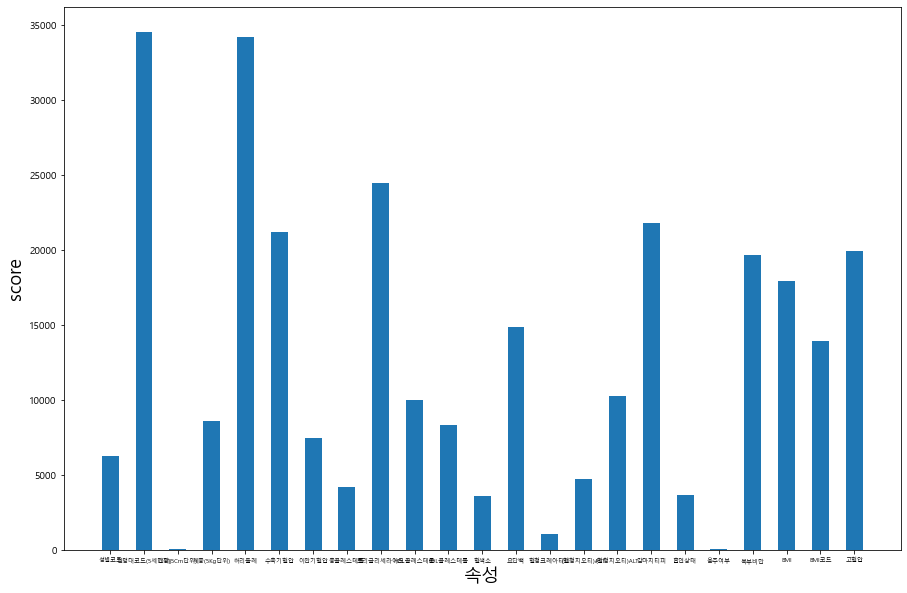

In [33]:
#분산분석(ANOVA) F검정 통계값
#그룹내 분산이 작고 그룹간 분산이 클 경우 값이 커지는 F-value를 이용하여 변수를 선택한다. 각 변수마다 F값을 구해 F값이 큰 변수를 기준으로 변수를 선택하는 방법
from sklearn.feature_selection import SelectKBest, f_classif

array = df.values
X = array[:,0:23]
Y = array[:,23]

selectK = SelectKBest(score_func=f_classif, k='all')
selectK.fit(X,Y)
selectK.scores_

label = np.array(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '복부비만',
       'BMI', 'BMI코드', '고혈압'])
index = np.arange(len(label))


plt.bar(index, selectK.scores_, width=0.5)
plt.xlabel('속성', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.xticks(index, label, fontsize=6)
plt.show()


[0.005 0.058 0.034 0.034 0.061 0.056 0.057 0.067 0.067 0.059 0.068 0.062
 0.018 0.057 0.064 0.063 0.069 0.016 0.011 0.009 0.04  0.01  0.015]


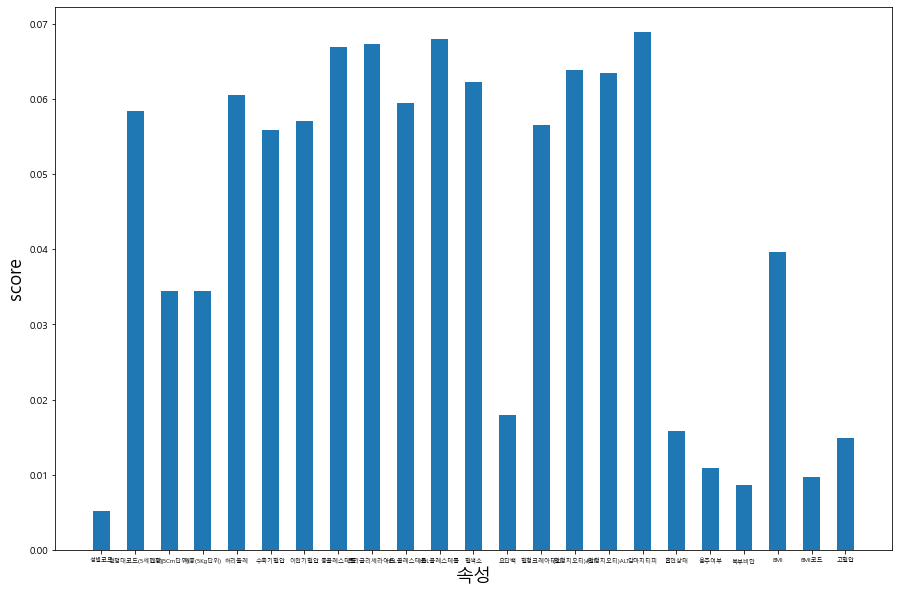

In [34]:
#트리 기반 모델(또는 선형모델)들이 특성 중요도(Feature Importance)를 제공하는 것에 기반한 방법
#특성 중요도는 예측의 불확실성을 낮출수록 증가하므로, (X,y)를 트리 기반 모델에 학습시킨 뒤, 특성 중요도가 기준치보다 높은 특성을 선택
from sklearn.ensemble import ExtraTreesClassifier

array = df.values
X = array[:,0:23]
Y = array[:,23]

etc_model = ExtraTreesClassifier()
etc_model.fit(X, Y)

print(etc_model.feature_importances_)

label = np.array(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '복부비만',
       'BMI', 'BMI코드', '고혈압'])
index = np.arange(len(label))


plt.bar(index, etc_model.feature_importances_, width=0.5)
plt.xlabel('속성', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.xticks(index, label, fontsize=6)
plt.show()

In [35]:
#랜덤 포레스트도 특성 중요도
from sklearn.ensemble import RandomForestClassifier

array = df.values
X = array[:,0:23]
Y = array[:,23]

forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X,Y)

print("특성 중요도 : \n{}".format(forest.feature_importances_))



특성 중요도 : 
[0.006 0.05  0.029 0.029 0.061 0.057 0.056 0.073 0.079 0.062 0.075 0.067
 0.016 0.043 0.065 0.064 0.072 0.015 0.01  0.007 0.048 0.008 0.011]


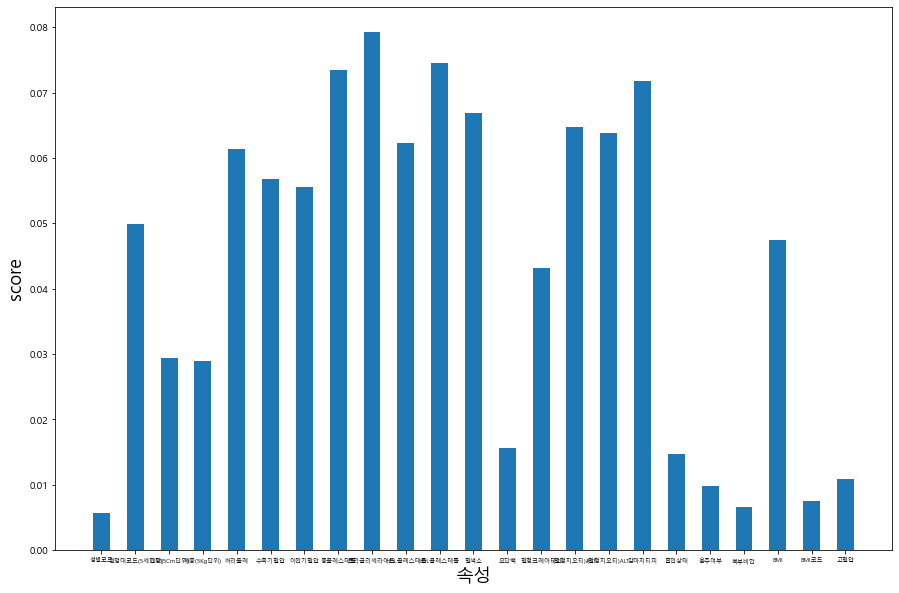

In [36]:
label = np.array(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '복부비만',
       'BMI', 'BMI코드', '고혈압'])
index = np.arange(len(label))


plt.bar(index, forest.feature_importances_, width=0.5)
plt.xlabel('속성', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.xticks(index, label, fontsize=6)
plt.show()

카이제곱  ->
트리글리세라이드 감마지티피 alt ast ldl hdl

아노바 ->
연령대 허리둘레 트리글리세라이드 감마지티피 수축기 고혈압 복부비만

익스트라랜덤 ->
감마지티피 LDL 트리글리세라이드 총콜레 ast, alt,혈색소, 허리둘레, 연령대

랜덤포레스트 ->
트리글리세라이드 ldl, 총콜레, 감마지티피, 혈색소, ast,alt, hdl, 허리둘레

모델링할 특성 -> 트리글리세라이드 감마지티피 허리둘레 총콜레 연령대코드 혈색소 ast,alt

In [9]:
df

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,복부비만,BMI,BMI코드,고혈압,당뇨병
0,1,8,170,75,90.00000,120.00000,80.00000,193.00000,92.00000,48.00000,126.00000,17.10000,1.00000,1.00000,21.00000,35.00000,40.00000,1.00000,1.00000,1,25.95156,1,1,0
1,1,7,180,80,89.00000,130.00000,82.00000,228.00000,121.00000,55.00000,148.00000,15.80000,1.00000,0.90000,20.00000,36.00000,27.00000,3.00000,0.00000,0,24.69136,0,1,1
2,1,9,165,75,91.00000,120.00000,70.00000,136.00000,104.00000,41.00000,74.00000,15.80000,1.00000,0.90000,47.00000,32.00000,68.00000,1.00000,0.00000,1,27.54821,1,1,0
3,1,11,175,80,91.00000,145.00000,87.00000,201.00000,106.00000,76.00000,104.00000,17.60000,1.00000,1.10000,29.00000,34.00000,18.00000,1.00000,0.00000,1,26.12245,1,2,0
4,1,11,165,60,80.00000,138.00000,82.00000,199.00000,104.00000,61.00000,117.00000,13.80000,1.00000,0.80000,19.00000,12.00000,25.00000,1.00000,0.00000,0,22.03857,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999978,1,8,180,65,77.00000,123.00000,89.00000,158.00000,139.00000,70.00000,60.00000,15.90000,1.00000,1.00000,11.00000,8.00000,15.00000,3.00000,1.00000,0,20.06173,0,1,0
999979,1,13,155,60,87.00000,129.00000,70.00000,274.00000,239.00000,45.00000,181.00000,16.40000,1.00000,1.30000,65.00000,127.00000,64.00000,3.00000,1.00000,0,24.97399,0,1,0
999981,2,14,155,55,83.00000,146.00000,69.00000,216.00000,122.00000,43.00000,148.00000,12.40000,1.00000,0.70000,21.00000,15.00000,23.00000,1.00000,0.00000,0,22.89282,0,2,0
999982,2,14,155,55,84.00000,130.00000,80.00000,222.00000,173.00000,39.00000,148.00000,12.90000,1.00000,0.80000,29.00000,14.00000,19.00000,1.00000,0.00000,0,22.89282,0,1,0


# 회귀분석 모델

In [77]:
from sklearn.linear_model import LogisticRegression #회귀분석모델 사용
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

train_df = df[["연령대코드(5세단위)", "허리둘레", "총콜레스테롤", "트리글리세라이드", "혈색소", "(혈청지오티)AST", "(혈청지오티)ALT","감마지티피","당뇨병"]].copy()
labels = ['정상', '당뇨']

data = train_df.drop(['당뇨병'], axis=1)
target = train_df['당뇨병']

#선형 회귀 계열의 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능 영향을 받을 수 있으므로 
#데이터에 먼저 정규 분포 형태의 표준 스케일링을 적용한 뒤에 train_test_split()을 이용해 데이터셋을 분리 한다.

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, target, test_size=0.3, random_state=0)

model = LogisticRegression(C = 0.01, penalty = 'l2')
model.fit(X_train, y_train)
predicts = model.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, predicts)))


accuracy: 0.919


In [78]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.920


In [29]:
from sklearn.preprocessing import RobustScaler #outlier의 영향을 최소화 할수 있는 robust scaling 진행

scaler = RobustScaler()
data_scaled = scaler.fit_transform(data)

X_train , X_test, y_train , y_test = train_test_split(data, target, test_size=0.3, random_state=0)

# 의사결정나무

In [32]:
from sklearn.tree import DecisionTreeClassifier #의사결정트리

estimator = DecisionTreeClassifier()
params = {'criterion':['gini','entropy'], 'max_depth':[None,2,3,4,5,6], 'max_leaf_nodes':[None,2,3,4,5,6,7], 'min_samples_split':[2,3,4,5,6], 'min_samples_leaf':[1,2,3]}
grid_clf = GridSearchCV(estimator, param_grid=params, cv=3, scoring='accuracy', n_jobs = -1)
grid_clf.fit(X_train, y_train)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}, 최적 평균 정확도:0.920


In [75]:
model = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 5, min_samples_leaf = 1, min_samples_split = 3)
model.fit(X_train, y_train)
predicts = model.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,predicts)))

예측 정확도: 0.9202


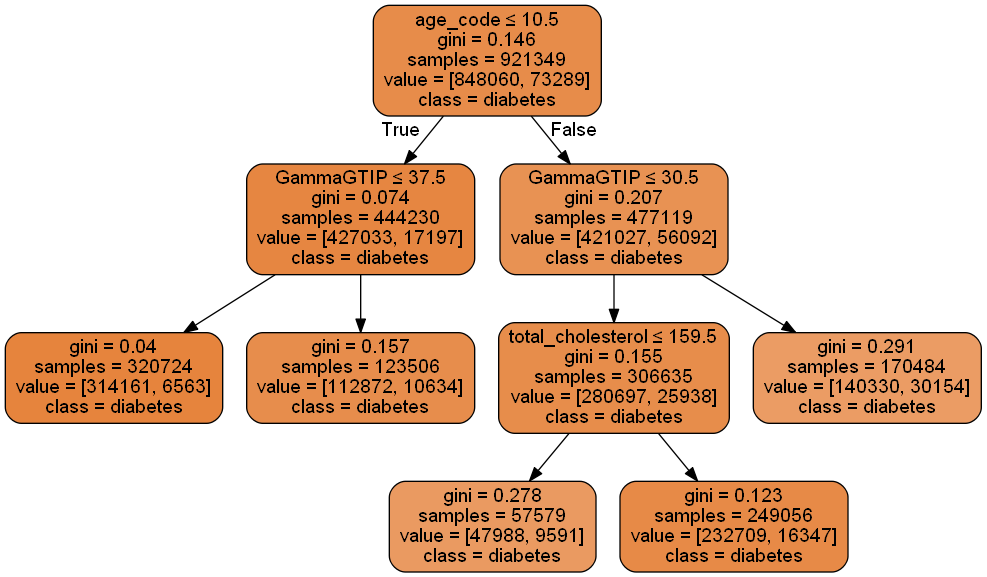

In [76]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image


dot_data = export_graphviz(model, out_file=None, feature_names=["age_code", "waist", "total_cholesterol", "triglyceride", "hemochromatic", "AST", "ALT","GammaGTIP"],
                          class_names=["diabetes"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# 랜덤포레스트

In [23]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.9205


In [95]:
model = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 8,
                                min_samples_leaf = 8,
                                min_samples_split = 20,
                                random_state = 0,
                                n_jobs = -1)
model.fit(X_train, y_train)
predicts = model.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,predicts)))

예측 정확도: 0.9202


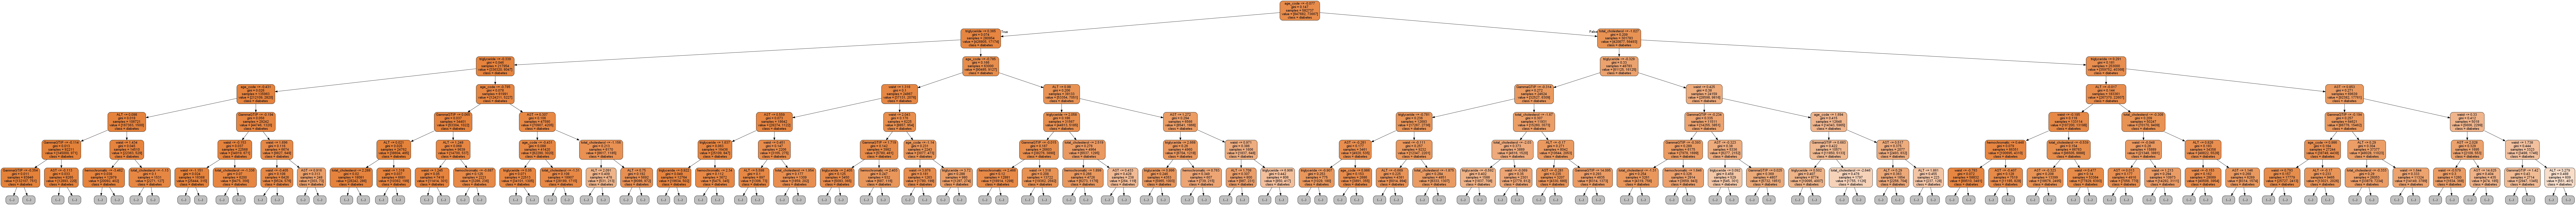

In [99]:
estimator = model.estimators_[3]

dot_data = export_graphviz(estimator, out_file=None, 
                feature_names = ["age_code", "waist", "total_cholesterol", "triglyceride", "hemochromatic", "AST", "ALT","GammaGTIP"],
                class_names=["diabetes"],
                max_depth = 6, #표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())